In [ ]:
# Cargar los datos y obtener el modelo
from common_model import *
mdl, produccion_vars, products = create_model()
solve_model(mdl, produccion_vars, products)

Model: guia5problematipo2
 - number of variables: 3
   - binary=0, integer=0, continuous=3
 - number of constraints: 9
   - linear=9
 - parameters: defaults
 - objective: none
 - problem type is: LP
* Production model solved with objective: 5700
* Total benefit=5700
Production of A: 50.0
Production of B: 80.0
Production of C: 0


In [ ]:
#***Added by JL - 2024 Mar 03th - Checking sensitivity analysis *****')

# Initialize lists to store the results
rhs_values = []
dual_values = []

#real_rhs_value = 0

m = 0.01


In [ ]:
# Report values for the chart

def report(rhs_value, dual_value):
    rhs_values.append(rhs_value)
    dual_values.append(dual_value) #Diferencia con grafico Costo Op dem min B vs disp
    


In [ ]:
def iterate_over_rhs(constraint_nameX, constraint_nameY): # aux: var mdl, 'm', y funciones.
    c = mdl.get_constraint_by_name(constraint_nameX)
    if c is None:
        print("Constraint with name '{0}' not found.".format(constraint_nameX))
        return
            
    # Perform initial sensitivity analysis to get the starting lower and upper bounds
    initial_sensitivity = perform_sensitivity_analysis(mdl) # Aux: obtiene (lower, upper)
    print("[debug] initial sensitivity", initial_sensitivity)
    print("[debug] constraint_nameY:", constraint_nameY)
    print("[debug] constraint_nameY type:", type(constraint_nameY))
    
    # Find the sensitivity range for the specified constraint
    for c_sens, (lower, upper) in zip(mdl.iter_constraints(), initial_sensitivity):
        print("[debug] for c_sens, (lower, upper):", c_sens, (lower, upper))
        if c_sens.name == constraint_nameX:
            
            # Report the real RHS value for the chart
            #global real_rhs_value #use the global keyword to declare that you want the function to update the global variable
            real_rhs_value = c_sens.rhs.constant ### aux: ok agrega el actual, es una cte aparte
            report(real_rhs_value, constraint_nameY.dual_value)

        
            # *********Store and report the initial lower and upper bounds for the chart*********
            print("---Initial lower bound: {0}".format(lower))
            rhs = lower
            solution = solve(c, rhs, mdl, products, produccion_vars)
            if solution is not None:
                report(rhs, constraint_nameY.dual_value)

            print("---Initial upper bound: {0}".format(upper))
            rhs = upper
            solution = solve(c, rhs, mdl, products, produccion_vars)
            if solution is not None and rhs < mdl.infinity:
                report(rhs, constraint_nameY.dual_value)
            # ********* End of lower and upper bounds *********
            
            
            #Decrease rhs starting from lower bound - m
            rhs = lower - m
            while True:
                print("[debug] Viendo para rhs:", rhs)
                if rhs < 0:
                    break ## Stop if the rhs is lower than 0                
            
                solution = solve(c, rhs, mdl, products, produccion_vars)
                if solution is None:
                    break  # Stop if the model is infeasible
                else:
                    #report(rhs, constraint_nameY.dual_value) #Diferencia con grafico funcional vs disp
                    #report(c_sens.rhs.constant, constraint_nameY.dual_value) ### Aux, veamos si así queda 126 y no 125.99
                    print("[debug al append] rhs:", rhs)
                    print("[debug al append] c_sens.rhs.constant:", c_sens.rhs.constant)
                    report(rhs + m, constraint_nameY.dual_value)
                    
                # Perform sensitivity analysis to get the new lower bound
                new_sensitivity = perform_sensitivity_analysis(mdl)    
                print("[debug] sensitivity", new_sensitivity)            
                for c_new_sens, (new_lower, _) in zip(mdl.iter_constraints(), new_sensitivity):
                    if c_new_sens.name == constraint_nameX: 
                        rhs = new_lower
                        if rhs < 0:
                            break ## Stop if the rhs is lower than 0                
                            
                        solution = solve(c, rhs, mdl, products, produccion_vars)
                        if solution is None:
                            break  # Stop if the model is infeasible
                        report(c_new_sens.rhs.constant, constraint_nameY.dual_value)
                        
                        rhs = new_lower - m #### aux: es para la sgte vuelta del while

                        break


            # Increase rhs starting from upper bound + m
            rhs = upper + m
            
            while True:
                print("[debug] Viendo para rhs:", rhs)
                if rhs >= mdl.infinity:
                    break ## Stop if the rhs reaches or exceeds infinity

                solution = solve(c, rhs, mdl, products, produccion_vars)
                if solution is None:
                    break  # Stop if the model is infeasible
                else:
                    report(rhs-m, constraint_nameY.dual_value) #Diferencia con grafico funcional vs disp

                # Perform sensitivity analysis to get the new upper bound
                new_sensitivity = perform_sensitivity_analysis(mdl)
                for c_new_sens, (_, new_upper) in zip(mdl.iter_constraints(), new_sensitivity):
                    if c_new_sens.name == constraint_nameX:                        
                        rhs = new_upper
                        if rhs >= mdl.infinity:
                            break ## Stop if the rhs reaches or exceeds infinity

                        solution = solve(c, rhs, mdl, products, produccion_vars)
                        if solution is None:
                            break  # Stop if the model is infeasible
                        report(c_new_sens.rhs.constant, constraint_nameY.dual_value)
                        
                        rhs = new_upper + m

                        break
    return real_rhs_value

In [ ]:
### Debug
print("rhs_values:",rhs_values)
#print("real_rhs_value:",real_rhs_value) # aux: es el actual, el bi
print("dual_values:", dual_values)
print("")
#print("constraint_nameX:", constraint_nameX)
#print("constraint_nameY:", constraint_nameY)
print("")
print("mdl:", mdl)
print("mdl:", mdl.solution)
# if 0 not in rhs_values, significa que antes de su mín es incompatible.., revisar

rhs_values: []
dual_values: []


mdl: docplex.mp.Model['guia5problematipo2']
mdl: solution for: guia5problematipo2
objective: 5700
status: OPTIMAL_SOLUTION(2)
produccion_A_50_100_0=50.000
produccion_B_40_120_80=80.000



In [ ]:
# Usage of the iterate_over_rhs method
constraint_nameX = 'Disp_Equipo3'  # The name of the constraint X to analyze
constraint_nameY = mdl.get_constraint_by_name('Disp_Equipo3') # The name of the constraint Y to analyze

real_rhs_value = iterate_over_rhs(constraint_nameX, constraint_nameY)

[debug] initial sensitivity [(104.0, 1e+20), (126.0, 1e+20), (80.0, 140.0), (50.0, 1e+20), (80.0, 1e+20), (0.0, 1e+20), (-1e+20, 50.0), (50.0, 110.0), (-1e+20, 0.0)]
[debug] constraint_nameY: Disp_Equipo3: 0.600produccion_A_50_100_0+produccion_B_40_120_80+0.600produccion_C_30_999999999999999_0 <= 110
[debug] constraint_nameY type: <class 'docplex.mp.constr.LinearConstraint'>
[debug] for c_sens, (lower, upper): Disp_Equipo1: 0.800produccion_A_50_100_0+0.800produccion_B_40_120_80+0.300produccion_C_30_999999999999999_0 <= 160 (104.0, 1e+20)
[debug] for c_sens, (lower, upper): Disp_Equipo2: 0.600produccion_A_50_100_0+1.200produccion_B_40_120_80 <= 180 (126.0, 1e+20)
[debug] for c_sens, (lower, upper): Disp_Equipo3: 0.600produccion_A_50_100_0+produccion_B_40_120_80+0.600produccion_C_30_999999999999999_0 <= 110 (80.0, 140.0)
---Initial lower bound: 80.0
---
- Adjusting RHS to: 80.0
* Production model solved with objective: 3200
* Total benefit=3200
Production of A: 0
Production of B: 80.0
Pr

In [ ]:
### Debug _ Notar que quedó en 12800 el Z, al terminar de iterar
print("rhs_values:",rhs_values)
print("real_rhs_value:",real_rhs_value) # es el actual, el bi
print("dual_values:", dual_values)
print("")
print("constraint_nameX:", constraint_nameX)
print("constraint_nameY:", constraint_nameY)
print("")
print("mdl:", mdl)
print("mdl:", mdl.solution) # por eso esto printea basura (no es la solución óptima de verdad)
# if 0 not in rhs_values, significa que antes de su mín es incompatible.., revisar

rhs_values: [110, 80.0, 140.0, 140.0, 172.0, 172.0, 272.0, 272.0]
real_rhs_value: 110
dual_values: [83.33333333333334, 83.33333333333334, 83.33333333333334, 50.0, 50.0, 30.0, 30.0, 0]

constraint_nameX: Disp_Equipo3
constraint_nameY: Disp_Equipo3: 0.600produccion_A_50_100_0+produccion_B_40_120_80+0.600produccion_C_30_999999999999999_0 <= 272.01

mdl: docplex.mp.Model['guia5problematipo2']
mdl: solution for: guia5problematipo2
objective: 12800
status: OPTIMAL_SOLUTION(2)
produccion_B_40_120_80=80.000
produccion_C_30_999999999999999_0=320.000



# Entonces, las dos mejoras
## Cambiando la restricción para el análisis y el gráfico, y las mejoras son ordenar la lista y sacar el 'infinito' del final

In [ ]:
### EJECUTAR ESTO DE NUEVO PARA QUE MDL NO HAYA QUEDADO VALIENDO NONE DE UNA ITERACIÓN ANTERIOR
from common_model import *
mdl, produccion_vars, products = create_model()
solve_model(mdl, produccion_vars, products)

### E INICIALIZAR LISTAS DE NUEVO PARA QUE NO ACUMULEN SOBRE LO DE LA CORRIDA ANTERIOR
# Initialize lists to store the results
rhs_values = []
dual_values = []

#real_rhs_value = 0

m = 0.01

Model: guia5problematipo2
 - number of variables: 3
   - binary=0, integer=0, continuous=3
 - number of constraints: 9
   - linear=9
 - parameters: defaults
 - objective: none
 - problem type is: LP
* Production model solved with objective: 5700
* Total benefit=5700
Production of A: 50.0
Production of B: 80.0
Production of C: 0


In [ ]:
### AHORA CON DISP EQUIPO *2*.
# Usage of the iterate_over_rhs method
constraint_nameX = 'Disp_Equipo2'  # The name of the constraint X to analyze
constraint_nameY = mdl.get_constraint_by_name(constraint_nameX)  # The name of the constraint X to analyze

real_rhs_value = iterate_over_rhs(constraint_nameX, constraint_nameY)

[debug] initial sensitivity [(104.0, 1e+20), (126.0, 1e+20), (80.0, 140.0), (50.0, 1e+20), (80.0, 1e+20), (0.0, 1e+20), (-1e+20, 50.0), (50.0, 110.0), (-1e+20, 0.0)]
[debug] constraint_nameY: Disp_Equipo2: 0.600produccion_A_50_100_0+1.200produccion_B_40_120_80 <= 180
[debug] constraint_nameY type: <class 'docplex.mp.constr.LinearConstraint'>
[debug] for c_sens, (lower, upper): Disp_Equipo1: 0.800produccion_A_50_100_0+0.800produccion_B_40_120_80+0.300produccion_C_30_999999999999999_0 <= 160 (104.0, 1e+20)
[debug] for c_sens, (lower, upper): Disp_Equipo2: 0.600produccion_A_50_100_0+1.200produccion_B_40_120_80 <= 180 (126.0, 1e+20)
---Initial lower bound: 126.0
---
- Adjusting RHS to: 126.0
* Production model solved with objective: 5700
* Total benefit=5700
Production of A: 50.0
Production of B: 80.0
Production of C: 0
---Initial upper bound: 1e+20
---
- Adjusting RHS to: 1e+20
* Production model solved with objective: 5700
* Total benefit=5700
Production of A: 50.0
Production of B: 80.0


In [ ]:
### Debug _ viendo
print("rhs_values:",rhs_values)
print("real_rhs_value:",real_rhs_value) # es el actual, el bi
print("dual_values:", dual_values)
print("")
print("constraint_nameX:", constraint_nameX)
print("constraint_nameY:", constraint_nameY)
print("")
print("mdl:", mdl)
print("mdl:", mdl.solution)
# if 0 not in rhs_values, significa que antes de su mín es incompatible.. revisar

rhs_values: [180, 126.0, 126.0, 96.0]
real_rhs_value: 180
dual_values: [0, 0, 33.333333333333336, 33.333333333333336]

constraint_nameX: Disp_Equipo2
constraint_nameY: Disp_Equipo2: 0.600produccion_A_50_100_0+1.200produccion_B_40_120_80 <= 95.99

mdl: docplex.mp.Model['guia5problematipo2']
mdl: None


In [ ]:
### Mejora1
# Armo pares y los ordeno según 'x'
pairs = []
for i in range(len(rhs_values)):
    pairs.append((rhs_values[i], dual_values[i]))

print("pairs", pairs)

#pairs.sort()
# Ordeno ascendentemente por la primera componente y desc por la segunda si hay empates
pairs.sort(key=lambda x: (x[0], -x[1]))

print("pairs", pairs)

## Agrego acá la Mejora 2: elimino el 'infinito' si está
#print("aux:", pairs[-1][0])
# Podría No appendearse el infinito directam, tmb
# if pairs[-1][0] == mdl.infinity:
#     pairs.pop()
#     print("pairs", pairs)
# Esto ya no es necesario xq la agregué en la función iterate.

# Los vuelvo a separar en listas, para no cambiar la función plot
new_rhs, new_dual = [], []
for elem in pairs:
    new_rhs.append(elem[0])
    new_dual.append(elem[1])
print("new_rhs", new_rhs)
print("new_dual", new_dual)

pairs [(180, 0), (126.0, 0), (126.0, 33.333333333333336), (96.0, 33.333333333333336)]
pairs [(96.0, 33.333333333333336), (126.0, 33.333333333333336), (126.0, 0), (180, 0)]
new_rhs [96.0, 126.0, 126.0, 180]
new_dual [33.333333333333336, 33.333333333333336, 0, 0]


In [ ]:
def get_text_for_plot(xunit, yunit):
    xlabel='{0} {1}'.format(constraint_nameX, xunit)
    ylabel='Valor Marginal \n {0} \n{1}'.format(constraint_nameX, yunit)
    title='Valor Marginal {}'.format(constraint_nameX)
    
    return {"xlabel": xlabel, "ylabel": ylabel, "title": title}

plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 33.333333333333336 96.0 126.0
plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 33.333333333333336 126.0 126.0
plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 0 126.0 180
[debug], returned ticks: [<matplotlib.axis.XTick object at 0x74eea9d4b9a0>, <matplotlib.axis.XTick object at 0x74eea9d4b970>, <matplotlib.axis.XTick object at 0x74eea9d4b460>, <matplotlib.axis.XTick object at 0x74eea9d029a0>]
[debug] real_rhs_value: 180


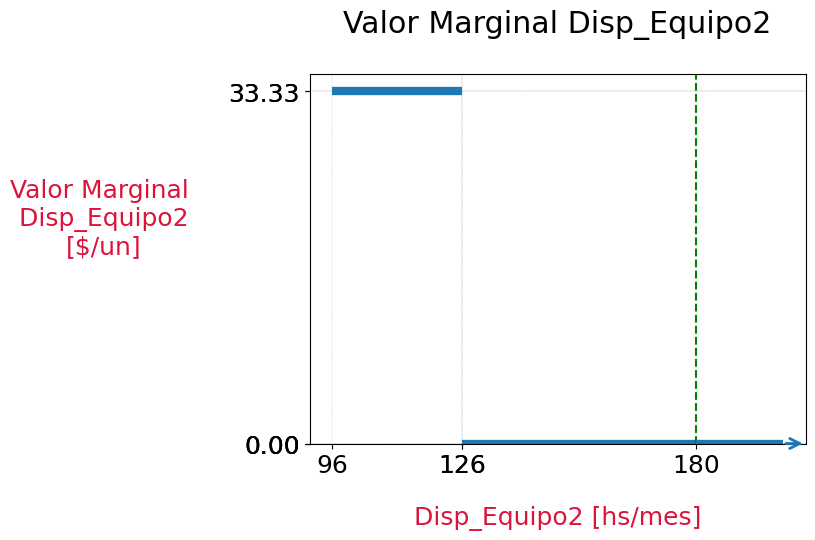

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# AHORA SÍ GRAFICO
plot_text = get_text_for_plot("[hs/mes]", "[$/un]")
plot(new_rhs, new_dual, real_rhs_value, plot_text)